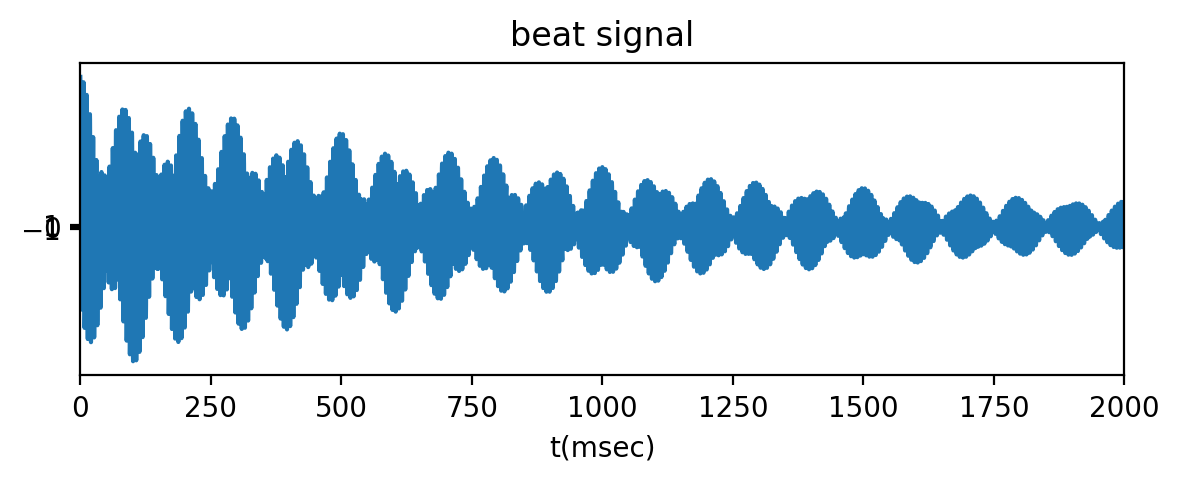

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
from IPython.core.pylabtools import figsize
import numpy as np
import matplotlib.pyplot as plt

#(a) 비트를 생성 함수
def beat(A, B, fc, df, dur, fs = 11025):
    t = np.arange(0, dur, 1/fs)
    x1 = A*np.exp(-0.0007*2*np.pi*(fc-df)*t)*np.cos(2*np.pi*(fc-df)*t)
    x2 = B*np.exp(-0.0007*2*np.pi*(fc+df)*t)*np.cos(2*np.pi*(fc+df)*t)
    
    x4 = B*np.exp(-0.0007*2*np.pi*(319.5+2.5)*t)*np.cos(2*np.pi*(319.5+2.5)*t)
    x = x1 + x2 + x4
    return x, t

#(b) 비트를 생성과 파형 플롯
from scipy import signal
fc, delf, fs, dur = 168, 5, 11025, 3
x, t = beat(30, 30, fc, delf, dur)
fig, ax = plt.subplots(figsize=(6,2.5))
ax.plot(t*1000, x)
ax.set_xlim(0, 2000)
ax.set_yticks([-1, 0, 1])
ax.set_xlabel('t(msec)')
ax.set_title('beat signal')
fig.tight_layout()

plt.show()

#(c) 비트를 들어보기
from IPython.display import Audio
Audio(data = x, rate = fs)

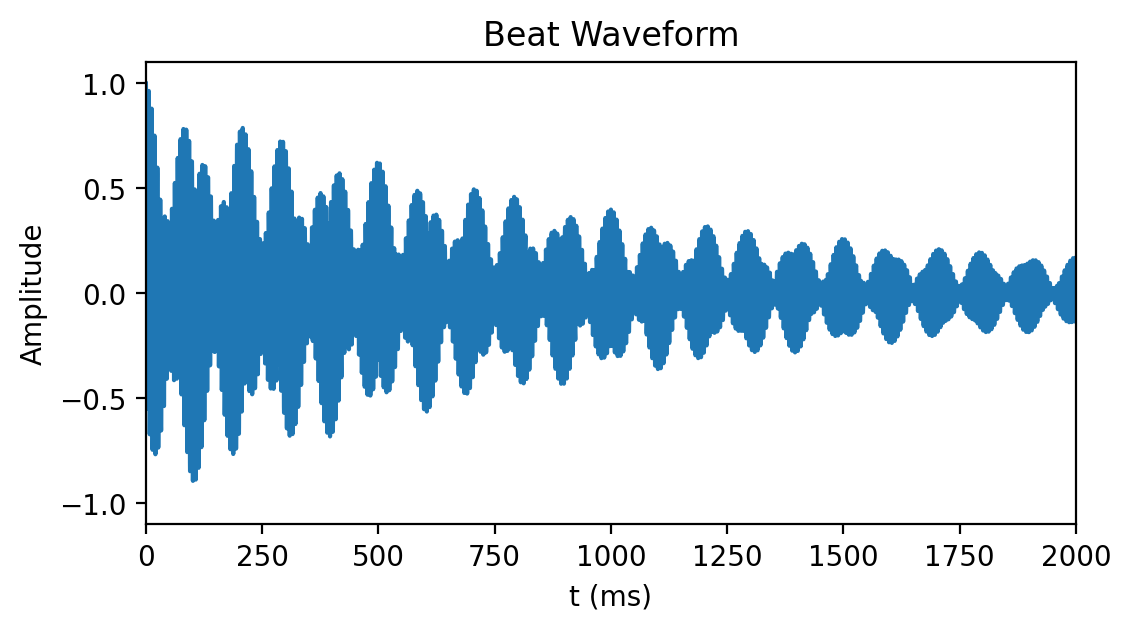

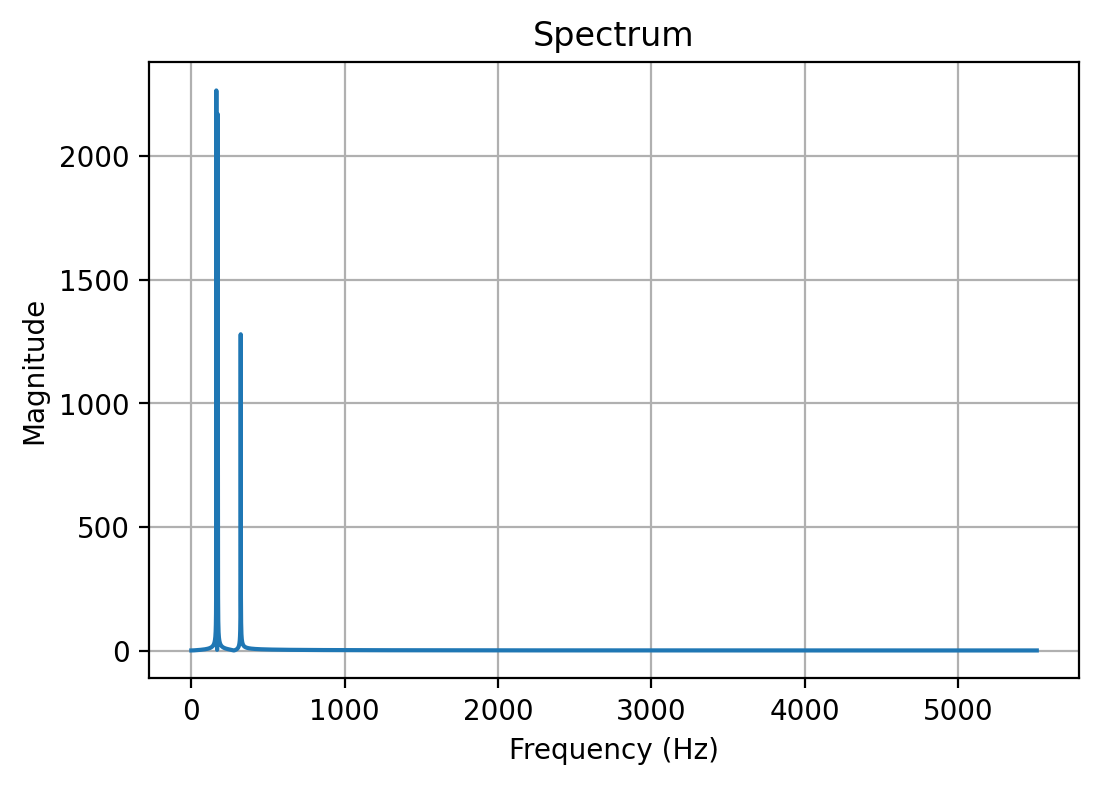

In [5]:
# 스펙트럼 비트 주파수 확인
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def plot_spectrum(x, fs):
    N = len(x)
    X = fft(x)
    freq = fftfreq(N, 1/fs)
    # 절반만 양의 주파수
    half = N // 2
    plt.figure(figsize=(6,4))
    plt.plot(freq[:half], np.abs(X[:half]))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Spectrum')
    plt.grid(True)
    plt.show()

# 네가 만든 beat 함수 사용
fc, delf, fs, dur = 168, 5, 11025, 3
x, t = beat(30, 30, fc, delf, dur)

# 정규화
x_norm = x / np.max(np.abs(x))

# 파형 보기
plt.figure(figsize=(6,3))
plt.plot(t*1000, x_norm)
plt.xlim(0, 2000)
plt.ylim(-1.1, 1.1)
plt.xlabel('t (ms)')
plt.ylabel('Amplitude')
plt.title('Beat Waveform')
plt.show()

# 스펙트럼 보기
plot_spectrum(x_norm, fs)

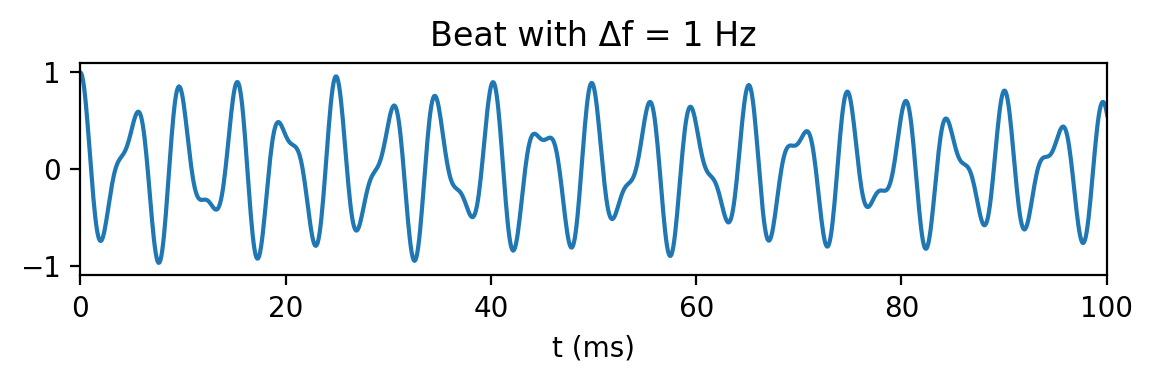

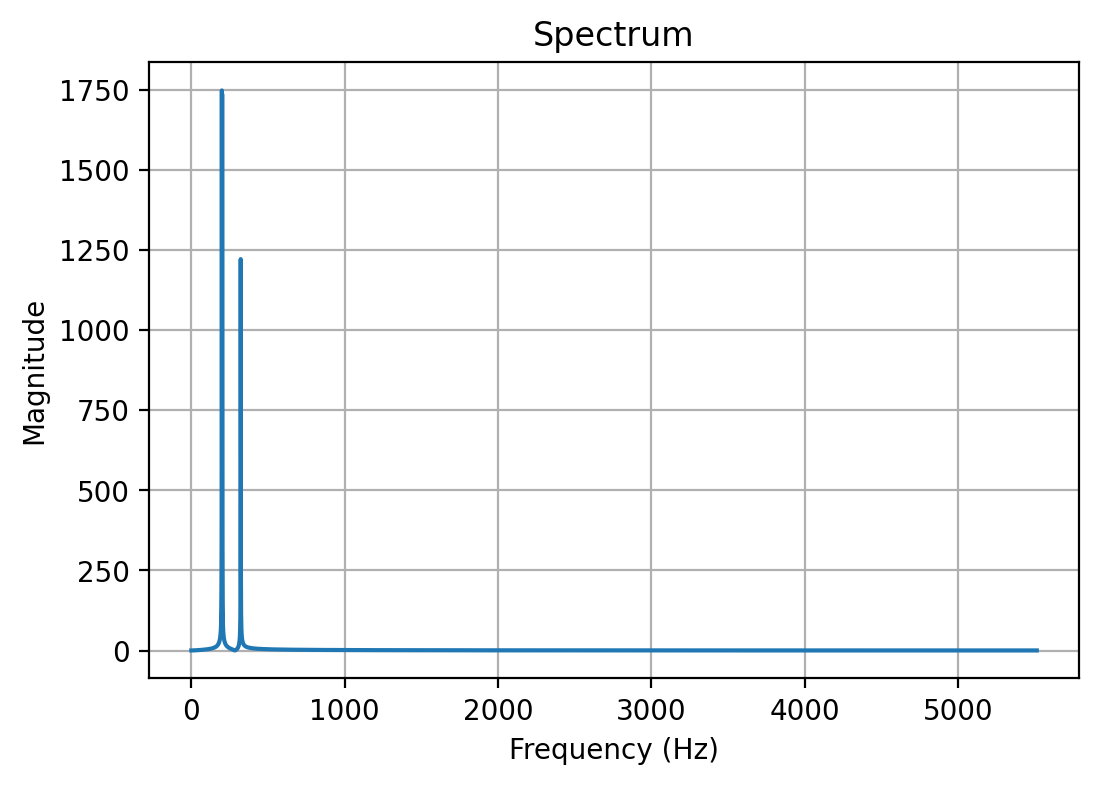

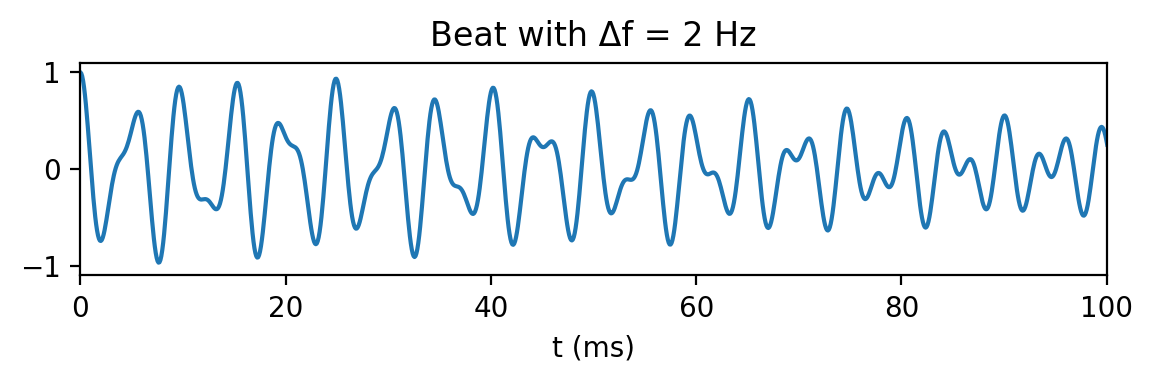

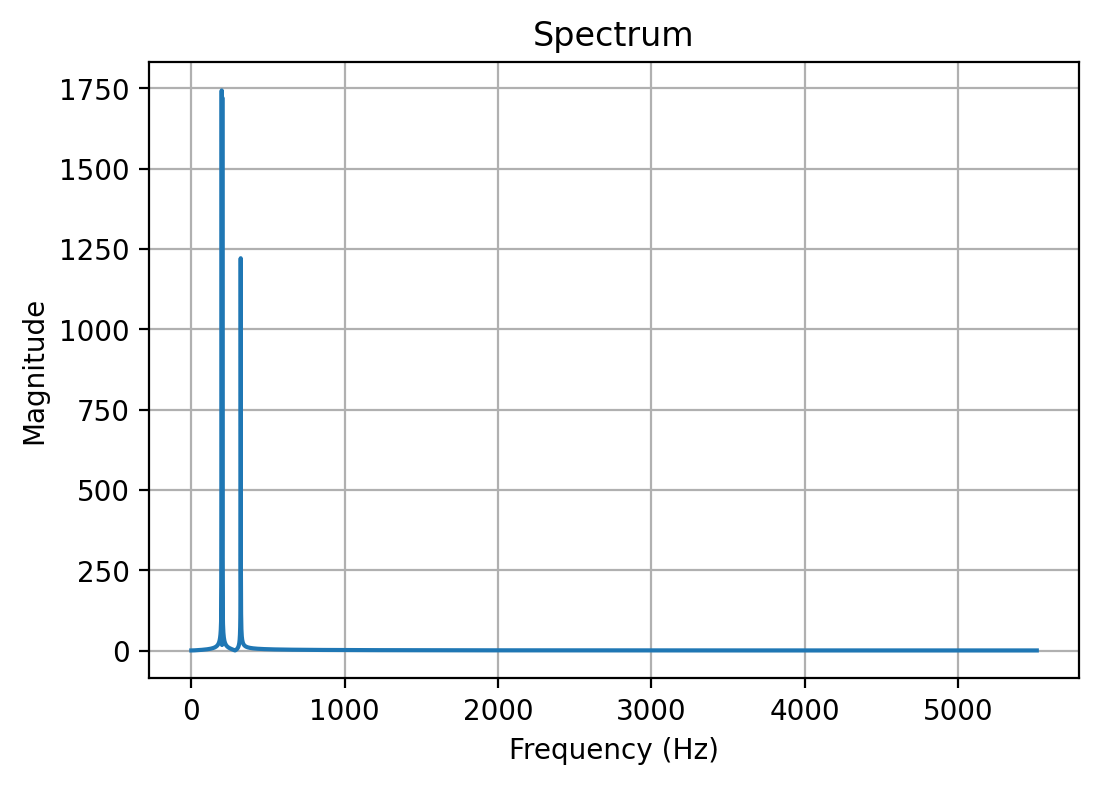

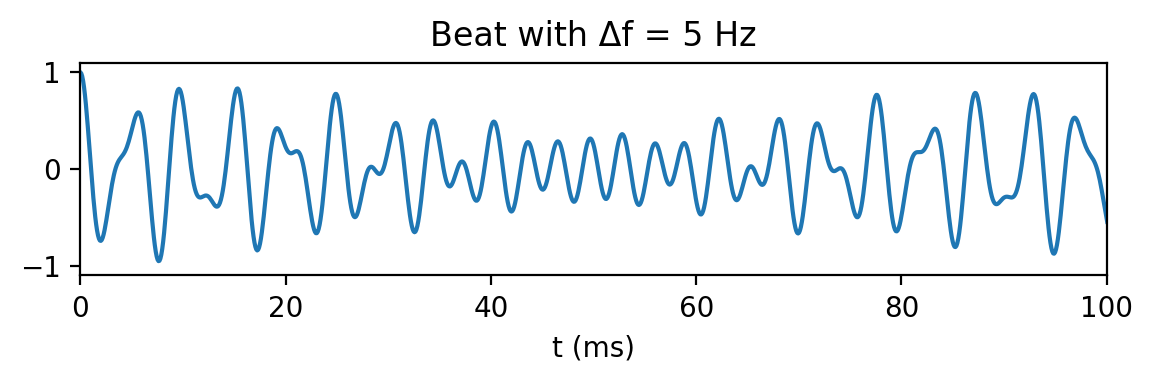

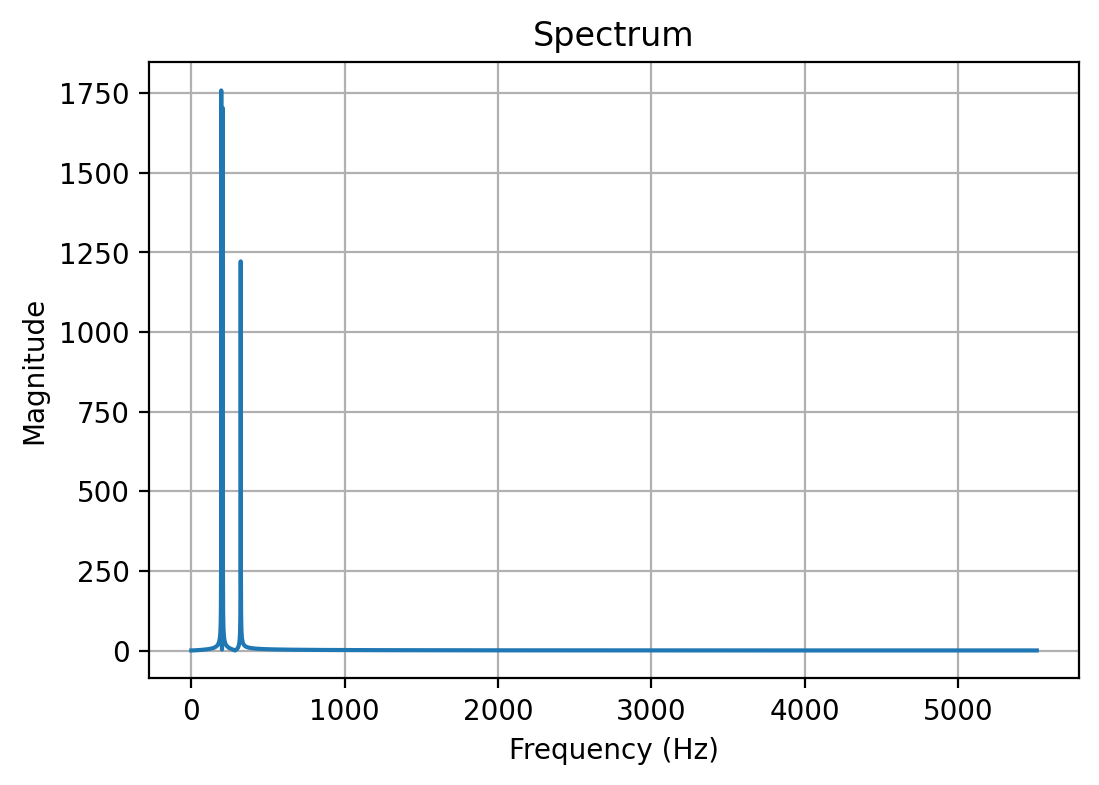

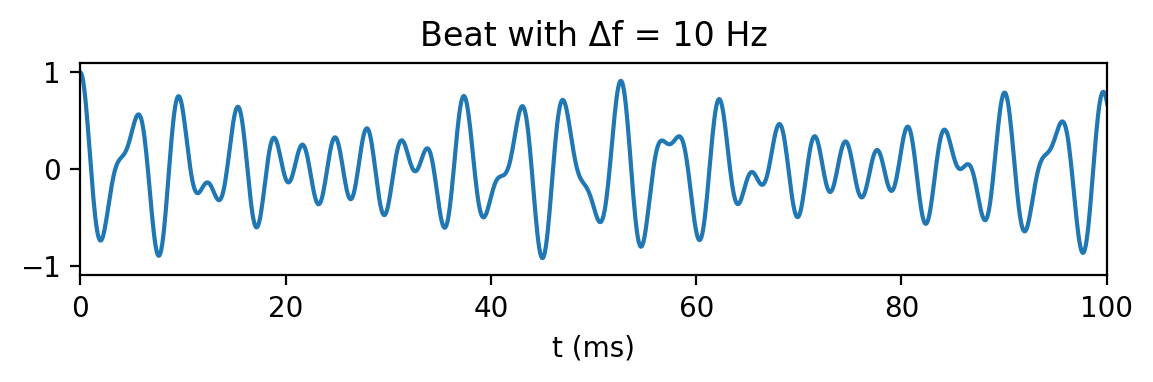

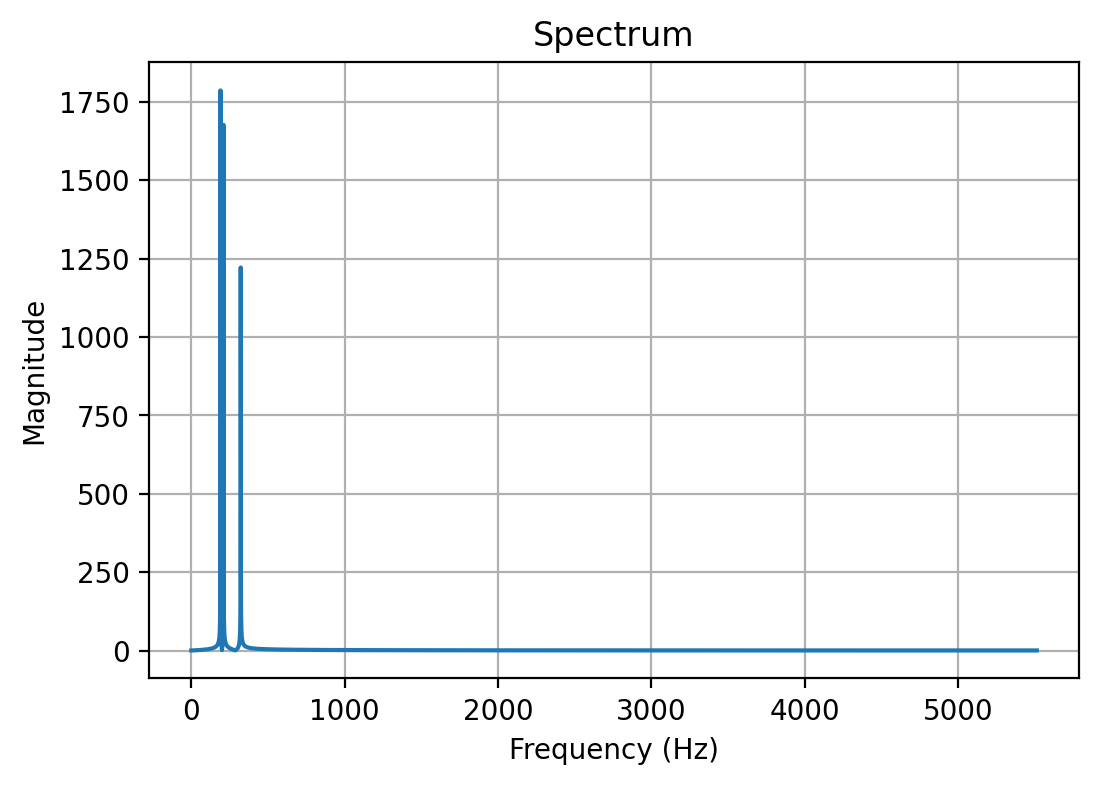

In [6]:
#비트 주파수 바꿔보기
import matplotlib.pyplot as plt

fs = 11025
dur = 2.0
fc = 200

for delf in [1, 2, 5, 10]:
    x, t = beat(1.0, 1.0, fc, delf, dur, fs)
    x = x / np.max(np.abs(x))
    plt.figure(figsize=(6,2))
    plt.plot(t*1000, x)
    plt.xlim(0, 100)  # 처음 100ms 정도만 확대
    plt.ylim(-1.1, 1.1)
    plt.title(f'Beat with Δf = {delf} Hz')
    plt.xlabel('t (ms)')
    plt.tight_layout()
    plt.show()

    plot_spectrum(x, fs)

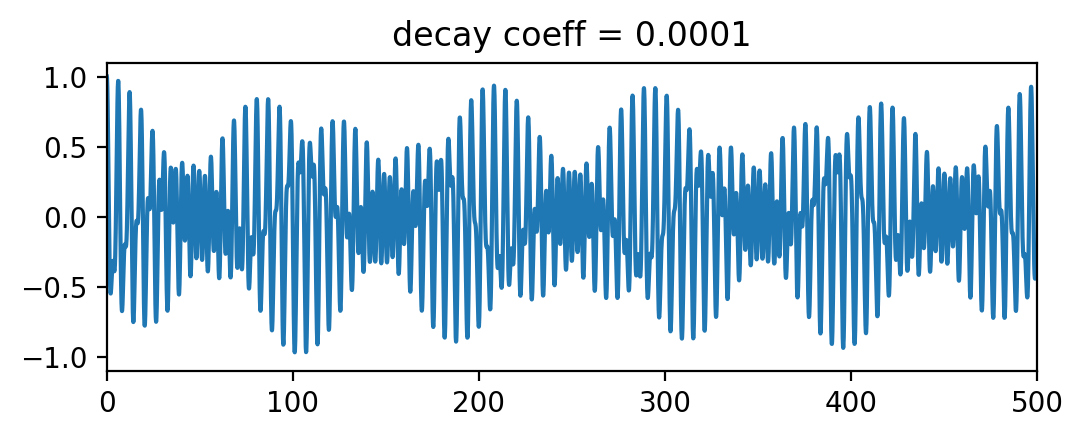

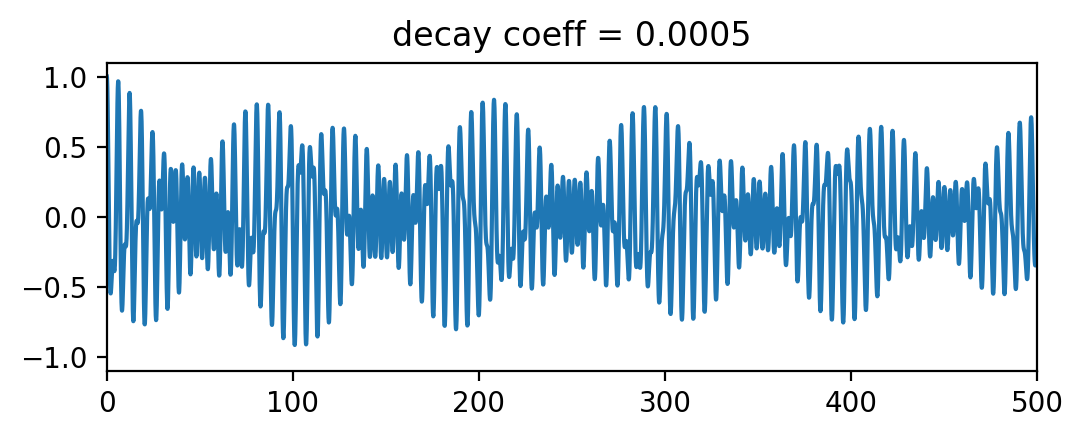

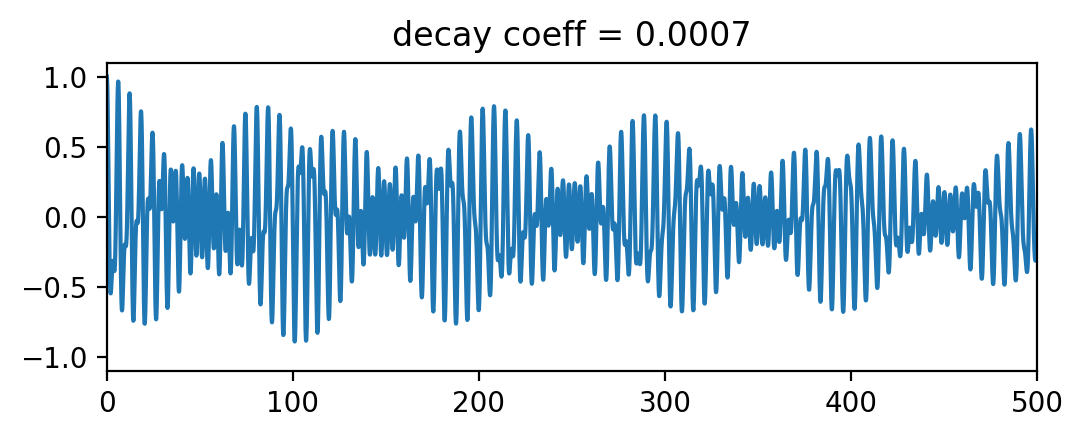

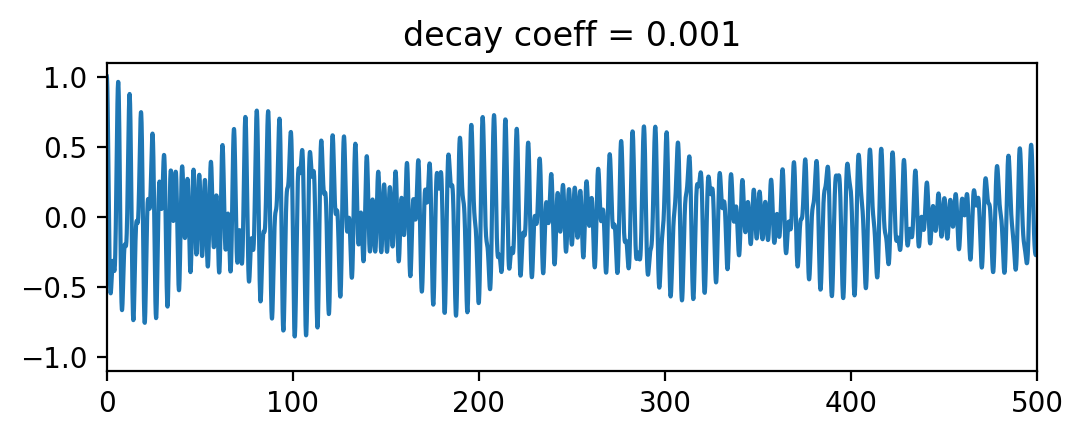

In [7]:
#진폭 감쇠 계수 바꿔보기
def beat_decay(A, B, fc, df, decay_coeff, dur, fs=11025):
    t = np.arange(0, dur, 1/fs)
    x1 = A*np.exp(-decay_coeff*2*np.pi*(fc-df)*t)*np.cos(2*np.pi*(fc-df)*t)
    x2 = B*np.exp(-decay_coeff*2*np.pi*(fc+df)*t)*np.cos(2*np.pi*(fc+df)*t)
    x4 = B*np.exp(-decay_coeff*2*np.pi*(319.5+2.5)*t)*np.cos(2*np.pi*(319.5+2.5)*t)
    x = x1 + x2 + x4
    return x, t

for decay in [0.0001, 0.0005, 0.0007, 0.001]:
    x, t = beat_decay(30, 30, 168, 5, decay, 3, 11025)
    x = x / np.max(np.abs(x))
    plt.figure(figsize=(6,2))
    plt.plot(t*1000, x)
    plt.xlim(0, 500)
    plt.ylim(-1.1, 1.1)
    plt.title(f'decay coeff = {decay}')
    plt.show()